# Домашнее задание 6

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_6

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

## __(а)__ Для такой задачи симулируем итерацию координатного спуска (смотри семинар). 

Для такого метода подберите шаг $\gamma$ для наилучшей сходимости постройте график сходимости (по оси $y$ - критерий $\| \nabla f(x^k)\|^2$, а по оси $x$ - число арифмитических операций при подсчете "градиента"). Постройте на этом же графике сходимость честного градиентного спуска c наилучшим шагом сходимости. Сделайте вывод о характере сходимости нового метода.

In [1]:
from scipy.stats import ortho_group
import numpy as np
def get_matrix_2(d,mu,L):
    vec=np.random.uniform(low=mu, high=L, size=d-2)
    vec=np.append(vec,mu)
    vec=np.append(vec,L)
    O=ortho_group.rvs(dim=d)
    D=np.diag(vec)
    temp=np.matmul(np.transpose(O),D)
    result = np.matmul(temp,O)
    return result

In [2]:
DIMENSIONS=100
mu=1
L=1000
EPSILON=0.00000001
A=get_matrix_2(DIMENSIONS,mu,L)
b=np.random.rand(DIMENSIONS)

In [3]:
def f(x):
    return 1/2*np.matmul(np.matmul(x.T,A),x)-np.matmul(b.T,x)
def grad_f(x):
    return np.matmul(A,x)-b.T

def coord_grad_f(x,coordinates): #Массив чисел 1,2,3... который выбирает какие конкретно координаты градиента нужны
    answer=np.zeros(DIMENSIONS)
    for i in coordinates:
        answer[i]=np.dot(A[i],x)-b[i]
    return answer

In [4]:
import scipy.stats as st
def coord_SGD(x_start,step,iterations ):
    x=x_start
    gradients=[]
    operations=[0]
    for i in range(iterations):
        gradients.append(np.linalg.norm(grad_f(x)))
        uni=st.randint(0,DIMENSIONS)
        j=uni.rvs()
        x=x-step*coord_grad_f(x,[j])
        oper=DIMENSIONS+1 #D умножений + сложение
        operations.append(operations[-1]+oper)
    return x,operations[:-1],gradients

### Различные шаги

На семинаре для координатного спуска получили оценку на шаг $\gamma \leq \frac{1}{4Ld}$. Попробуем протестировать шаги вида $\frac{a}{4Ld}$ для различных $a$ больше единицы и посмотреть где метод будет сходится лучше  всего

In [5]:
step=1/4/L/DIMENSIONS
coordinate_results=[]
for i in range(1,1000,200):
    coordinate_results.append(coord_SGD(np.zeros(DIMENSIONS),step=i*step,iterations=100))
for i in range(1500,4000,500):
    coordinate_results.append(coord_SGD(np.zeros(DIMENSIONS),step=i*step,iterations=100))

In [6]:
import matplotlib.pyplot as plt
plt.plot(coordinate_results[0][1],coordinate_results[0][2],label='1*theor_step')
plt.plot(coordinate_results[1][1],coordinate_results[1][2],label='200*theor_step')
plt.plot(coordinate_results[2][1],coordinate_results[2][2],label='400*theor_step')
plt.plot(coordinate_results[3][1],coordinate_results[3][2],label='800*theor_step')
plt.plot(coordinate_results[4][1],coordinate_results[4][2],label='1000*theor_step')
plt.plot(coordinate_results[5][1],coordinate_results[5][2],label='1500*theor_step')
plt.xlabel("число арифметических операций")
plt.legend()
plt.ylabel("$||grad f(x)||^2$")

Text(0,0.5,'$||grad f(x)||^2$')

Text(0,0.5,'$||grad f(x)||^2$')

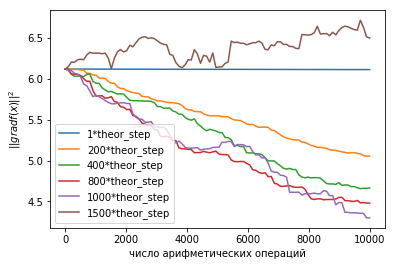

In [7]:
import matplotlib.pyplot as plt
plt.plot(coordinate_results[0][1],coordinate_results[0][2],label='1*theor_step')
plt.plot(coordinate_results[1][1],coordinate_results[1][2],label='200*theor_step')
plt.plot(coordinate_results[2][1],coordinate_results[2][2],label='400*theor_step')
plt.plot(coordinate_results[3][1],coordinate_results[3][2],label='800*theor_step')
plt.plot(coordinate_results[4][1],coordinate_results[4][2],label='1000*theor_step')
plt.plot(coordinate_results[5][1],coordinate_results[5][2],label='1500*theor_step')
plt.xlabel("число арифметических операций")
plt.legend()
plt.ylabel("$||grad f(x)||^2$")

На некоторых матрицах $\frac{1500}{4Ld}$ еще работает, на некоторых нет, будем считать что нет. График часто показывает что на $\frac{800}{4Ld}$ есть оптимум, иногда он перескакивает на $\frac{1000}{4Ld}$. Будем считать $\frac{800}{4Ld}$.

In [8]:
COORDINATE_SGD_RESULTS=coord_SGD(np.zeros(DIMENSIONS),step=800*step,iterations=5000)

In [9]:
import GD
CLASSICAL_GD=GD.GradientDescent(f,grad_f,L,np.zeros(DIMENSIONS),step_choose='optimal',stopping_criteria='delta_grad',additional_data=[mu],max_iterations=50)
CLASSICAL_GD_RESULTS=CLASSICAL_GD.compute()
operations=np.zeros(len(CLASSICAL_GD_RESULTS[2]))
for i in range(len(operations)-1):
    operations[i+1]=operations[i]+(DIMENSIONS*(DIMENSIONS+1))

amount of iterations is 49


Text(0,0.5,'$||grad f(x)||^2$')

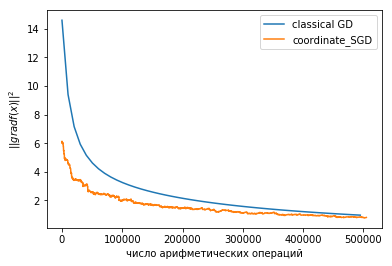

In [10]:
import matplotlib.pyplot as plt
plt.plot(operations,CLASSICAL_GD_RESULTS[2],label='classical GD')
plt.plot(COORDINATE_SGD_RESULTS[1],COORDINATE_SGD_RESULTS[2],label='coordinate_SGD')
#plt.rcParams['text.usetex'] = True
#plt.plot(operations,CLASSICAL_GD_RESULTS[2],label='classical GD')
plt.xlabel("число арифметических операций")
plt.legend()
plt.ylabel("$||grad f(x)||^2$")

На этой задаче координатный работает примерно так-же как классический.Как и обещали на семинаре

## __(б)__ В координатном спуске можно брать несколько координат вместо одной. Модифицируйте координнатный спуск, исходя из этого, пробуя разное число координат $b = 1, 5, 10, 20$, а также разные способы сэмплирования: все координатны независимо или зависимо, чтобы не было повторений в батче. Постройте графики аналогичные пункту (а). Сделайте вывод.

In [11]:
import time

In [12]:
coords=[1,5,10,20]

In [13]:
import scipy.stats as st
def independent_coord_SGD(x_start,step,iterations,n_coord):
    x=x_start
    gradients=[]
    operations=[0]
    for i in range(iterations):
        gradients.append(np.linalg.norm(grad_f(x)))
        uni=st.randint(0,DIMENSIONS)
        j=uni.rvs(n_coord)
        x=x-step*coord_grad_f(x,j)
        oper=n_coord*(DIMENSIONS+1) #Число координат*(D умножений + сложение)
        operations.append(operations[-1]+oper)
    return x,operations[:-1],gradients

In [14]:
independent_results=[]
for n_coord in coords:
    independent_results.append(independent_coord_SGD(np.zeros(DIMENSIONS),800*step,int(1000/n_coord),n_coord))

Зависимое сэмплирование :

In [15]:
import scipy.stats as st
def dependent_coord_SGD(x_start,step,iterations,n_coord):
    x=x_start
    gradients=[]
    operations=[0]
    inner_iter=DIMENSIONS/n_coord
    outer_ter=iterations/inner_ter
    for i in range(outer_iter):
        coordinates = np.arange(DIMENSIONS)
        for j in range(inner_iter):
            selected_coords=np.random_choice(coordinates,size=n_coord,replace=False)
            coordinates=np.setdiff1d(coordinates,selected_coords)
            
            gradients.append(np.linalg.norm(grad_f(x)))
            
            x=x-step*coord_grad_f(x,selected_coords)
            
            oper=n_coord*(DIMENSIONS+1) #D умножений + сложение
            operations.append(operations[-1]+oper)
    return x,operations[:-1],gradients

In [16]:
dependent_results=[]
for n_coord in coords:
    dependent_results.append(independent_coord_SGD(np.zeros(DIMENSIONS),800*step,int(1000/n_coord),n_coord))

Попробуем в целом сравнить подходы - зависимое или независимое сэмплирование, одно отобразим красное, другое синим

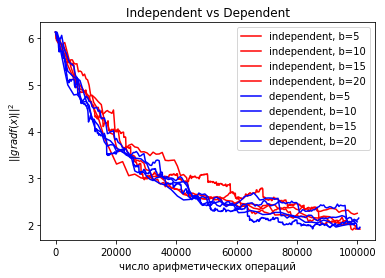

In [17]:
import matplotlib.pyplot as plt
plt.plot(independent_results[0][1],independent_results[0][2],label='independent, b=5',color='r')
plt.plot(independent_results[1][1],independent_results[1][2],label='independent, b=10',color='r')
plt.plot(independent_results[2][1],independent_results[2][2],label='independent, b=15',color='r')
plt.plot(independent_results[3][1],independent_results[3][2],label='independent, b=20',color='r')
plt.plot(dependent_results[0][1],dependent_results[0][2],label='dependent, b=5',color='b')
plt.plot(dependent_results[1][1],dependent_results[1][2],label='dependent, b=10',color='b')
plt.plot(dependent_results[2][1],dependent_results[2][2],label='dependent, b=15',color='b')
plt.plot(dependent_results[3][1],dependent_results[3][2],label='dependent, b=20',color='b')
plt.title("Independent vs Dependent")
plt.xlabel("число арифметических операций")
plt.legend()
plt.ylabel("$||grad f(x)||^2$")
plt.show()

Тяжело сказать, что какой-то подход однозначно выигрывает. Отрисуем теперь отдельно для зависимых и независимых и посмотрим как влияет число координат

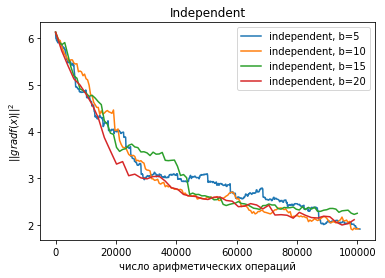

In [18]:
import matplotlib.pyplot as plt
plt.plot(independent_results[0][1],independent_results[0][2],label='independent, b=5')
plt.plot(independent_results[1][1],independent_results[1][2],label='independent, b=10')
plt.plot(independent_results[2][1],independent_results[2][2],label='independent, b=15')
plt.plot(independent_results[3][1],independent_results[3][2],label='independent, b=20')

#plt.plot(dependent_results[0][1],dependent_results[0][2],label='dependent, b=5')
#plt.plot(dependent_results[1][1],dependent_results[1][2],label='dependent, b=10')
#plt.plot(dependent_results[2][1],dependent_results[2][2],label='dependent, b=15')
#plt.plot(dependent_results[3][1],dependent_results[3][2],label='dependent, b=20')
plt.title("Independent")
plt.xlabel("число арифметических операций")
plt.legend()
plt.ylabel("$||grad f(x)||^2$")
plt.show()

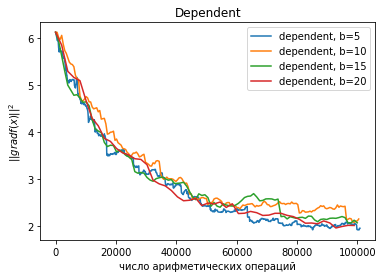

In [19]:
import matplotlib.pyplot as plt
#plt.plot(independent_results[0][1],independent_results[0][2],label='independent, b=5')
#plt.plot(independent_results[1][1],independent_results[1][2],label='independent, b=10')
#plt.plot(independent_results[2][1],independent_results[2][2],label='independent, b=15')
#plt.plot(independent_results[3][1],independent_results[3][2],label='independent, b=20')
plt.plot(dependent_results[0][1],dependent_results[0][2],label='dependent, b=5')
plt.plot(dependent_results[1][1],dependent_results[1][2],label='dependent, b=10')
plt.plot(dependent_results[2][1],dependent_results[2][2],label='dependent, b=15')
plt.plot(dependent_results[3][1],dependent_results[3][2],label='dependent, b=20')
plt.title("Dependent")
plt.xlabel("число арифметических операций")
plt.legend()
plt.ylabel("$||grad f(x)||^2$")
plt.show()

Увеличение числа координат в моих результатах выигрыша не дало

## Задача 2

Рассмотрим задачу линейной регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. 

Как и во втором ДЗ, константу $L$ можно оценить как норму матрицы $A=2*X^T*X$, деленную на n

### $$L=\frac{||2*X^T*X||}{n}$$

Покажем, что в качестве $\mu$ можно взять $2\lambda$

Пусть $f(x)$ - лосс без регуляризации, $r(x)$ - лосс с регуляризацией. 

Запишем теперь по определению что значит сильная выпуклость для $r(x)$ с $\mu=2\lambda$

$r(x)-r(x_0)\geq(\nabla r(x_0),x-x_0)+\frac{1}{2}2\lambda||x-x_o||^2$

И запишем выпуклость для $f(x)$

$f(x)-f(x_0)\geq (\nabla f(x_0),x-x_0)$

Вычтем из верхнего нижнее

$\lambda ||x||^2-\lambda||x_0||^2\geq(2\lambda x_0,x-x_0)+\lambda||x-x_0||^2$

Раскроем квадрат справа через сумму квадратов и скалярное произведение. Посокращаем слагаемые и получим

$-\lambda||x_0||^2\geq -2\lambda ||x_0||^2+\lambda ||x_0||^2$

Посклько в итоге здесь достигнуо равенство, то исходное неравенство для $\mu=2\lambda$ справедливо

### __(б)__ Реализуйте координатный SGD, SEGA для задачи линейно регрессии. Каким будете брать $b$? Как будете выбирать шаг и другие параметры методов?

Судя по результатам выше, выбор конкретного $b$ влияния на скорость не оказывает, возьмем его равным пяти

In [20]:
n_coord=5

In [21]:
from sklearn.datasets import load_svmlight_file
import numpy as np
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y=y-1.5
y=2*y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2,test_size=0.8, random_state=41)

In [57]:
A=2*np.dot(X_train.T,X_train)
b=2*np.dot(X_train.T,y_train)

In [58]:
N=len(X_train)
N

1624

In [59]:
L=np.linalg.norm(A)/N
L

21.516559348345652

In [60]:
DIMENSIONS=len(X_train[0])
DIMENSIONS

112

In [131]:
ITERATIONS=8000

In [132]:
def f(x):
    return (1/2*np.matmul(np.matmul(x.T,A),x)-np.matmul(b.T,x))/N
def grad_f(x):
    return (np.matmul(A,x)-b.T)/N

def coord_grad_f(x,coordinates): #Массив чисел 1,2,3... который выбирает какие конкретно координаты градиента нужны
    answer=np.zeros(DIMENSIONS)
    for i in coordinates:
        answer[i]=np.dot(A[i],x)-b[i] #coord*Dim умножений, Dim вычитаний
    answer=answer/N
    return answer

In [133]:
def SEGA(x_start,step,iterations):
    x=x_start
    xes=[x]
    operations=[0]
    gradients=[]
    times=[0]
    uni=st.randint(0,DIMENSIONS)
    h=np.zeros(DIMENSIONS)
    for i in range(iterations):
        
        iteration_start=time.time()
        picked=uni.rvs()
        h_old=h
        grad_i=coord_grad_f(x,[picked])[picked]
        h[picked]=grad_i
        
        g=h_old
        g[picked]=DIMENSIONS*grad_i-h_old[picked]

        x= x -step*g
        iteration_end=time.time()
        
        xes.append(x)
        Delta_time=iteration_end-iteration_start
        times.append(times[-1]+Delta_time)
        gradients.append(np.linalg.norm(grad_f(x))**2)
        
        oper=4*DIMENSIONS+2 # градиент : 1*Dim умножений, Dim вычитаний; 
                            # потом : умножение, вычитание
                            # шаг : Dim умножений, Dim вычитаний
                            # итого 4*DIM+2
        operations.append(operations[-1]+oper)
    return xes[1:],operations[1:],times[1:],gradients
        
    

In [134]:
def independent_coord_SGD(x_start,step,iterations,n_coord):
    x=x_start
    xes=[x]
    operations=[0]
    gradients=[]
    times=[0]
    uni=st.randint(0,DIMENSIONS)
    for i in range(iterations):
        
        iteration_start=time.time()
        j=uni.rvs(n_coord)
        x=x-step*DIMENSIONS*coord_grad_f(x,j)
        iteration_end=time.time()
        
        xes.append(x)
        
        Delta_time=iteration_end-iteration_start
        times.append(times[-1]+Delta_time)
        gradients.append(np.linalg.norm(grad_f(x))**2)
        
        oper=(n_coord+3)*DIMENSIONS+1  #градиент : n_coord*Dim умножений, Dim вычитаний
                                       #шаг : умножение, Dim умножений, Dim вычитаний
                                       #итого : (n_coord+3)*DIM+1
        operations.append(operations[-1]+oper)
        
    return xes[1:],operations[1:],times[1:],gradients

На семинаре получили что $\gamma_{theor} \leq \frac{1}{24*d*L}$ для SEGA и $\gamma_{theor} \leq \frac{1}{4*d*L}$ для координатного SGD

In [135]:
SEGA_step=1/24/DIMENSIONS/L
SGD_step=1/4/DIMENSIONS/L

In [136]:
SEGA_RESULTS=SEGA(np.zeros(DIMENSIONS),SEGA_step,2*ITERATIONS)

In [137]:
SGD_RESULTS=independent_coord_SGD(np.zeros(DIMENSIONS),SGD_step,ITERATIONS,n_coord)

### __(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество арифметических операций, по оси $y$ - $\|\nabla f(x^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

In [138]:
def get_accuracy(answer):
    y_pred=np.dot(answer,X_test.T)
    bool_arr = abs(y_pred - y_test) <= 0.1
    result_arr = np.where(bool_arr, 1, 0)
    return np.sum(result_arr)/len(result_arr)

### Норма-время

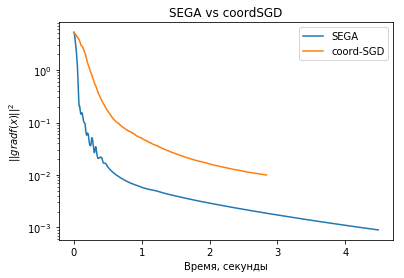

In [144]:
import matplotlib.pyplot as plt
plt.plot(SEGA_RESULTS[2],SEGA_RESULTS[3],label='SEGA')
plt.plot(SGD_RESULTS[2],SGD_RESULTS[3],label='coord-SGD')
plt.title("SEGA vs coordSGD")
plt.xlabel("Время, секунды")
plt.legend()
plt.yscale('log')
plt.ylabel("$||grad f(x)||^2$")
plt.show()

### Норма-операции

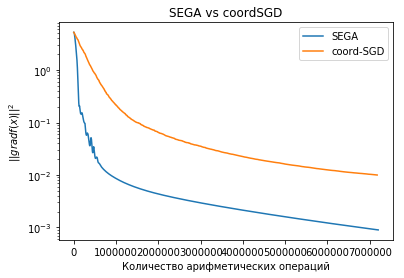

In [140]:
import matplotlib.pyplot as plt
plt.plot(SEGA_RESULTS[1],SEGA_RESULTS[3],label='SEGA')
plt.plot(SGD_RESULTS[1],SGD_RESULTS[3],label='coord-SGD')
plt.title("SEGA vs coordSGD")
plt.xlabel("Количество арифметических операций")
plt.legend()
plt.yscale('log')
plt.ylabel("$||grad f(x)||^2$")
plt.show()

In [141]:
SEGA_accuracy=[]
SGD_accuracy=[]
for i in range(0,len(SEGA_RESULTS[0])):
    SEGA_accuracy.append(get_accuracy(SEGA_RESULTS[0][i]))
for i in range(0,len(SGD_RESULTS[0])):
    SGD_accuracy.append(get_accuracy(SGD_RESULTS[0][i]))

### Точность-время

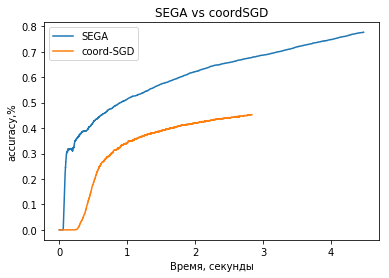

In [142]:
import matplotlib.pyplot as plt
plt.plot(SEGA_RESULTS[2],SEGA_accuracy,label='SEGA')
plt.plot(SGD_RESULTS[2],SGD_accuracy,label='coord-SGD')
plt.title("SEGA vs coordSGD")
plt.xlabel("Время, секунды")
plt.legend()
plt.ylabel("accuracy,%")
plt.show()

### Точность - операции

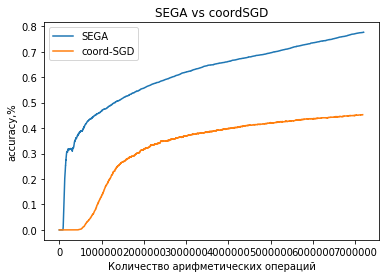

In [143]:
import matplotlib.pyplot as plt
plt.plot(SEGA_RESULTS[1],SEGA_accuracy,label='SEGA')
plt.plot(SGD_RESULTS[1],SGD_accuracy,label='coord-SGD')
plt.title("SEGA vs coordSGD")
plt.xlabel("Количество арифметических операций")
plt.legend()
plt.ylabel("accuracy,%")
plt.show()

__Вывод__: в данной задаче на всех графиках _SEGA_ показывает себя лучше 